In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

import os

In [ ]:
print(tf.__version__)

2.18.0


In [ ]:
import tensorflow as tf

# Check if TensorFlow detects GPU
print("TensorFlow GPU Available:", len(tf.config.list_physical_devices('GPU')) > 0)
print("Available GPUs:", tf.config.list_physical_devices('GPU'))

# Get details about the GPU
gpu_devices = tf.config.list_physical_devices('GPU')
if gpu_devices:
    print("GPU Device Name:", tf.config.experimental.get_device_details(gpu_devices[0])["device_name"])


TensorFlow GPU Available: True
Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU Device Name: Tesla T4


In [ ]:
# Check for available GPUs and set memory growth if available
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
print("Num GPUs Available: ", len(gpus))

Num GPUs Available:  1


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import random
import os

In [ ]:
file_path = '/content/HVAC Energy Data (1) - HVAC Energy Data (1).csv'
data = pd.read_csv(file_path)

In [ ]:
data.head()

,Local Time (Timezone : GMT+8h),Date,Time,Chilled Water Rate (L/sec),Cooling Water Temperature (C),Building Load (RT),Chiller Energy Consumption (kWh),Outside Temperature (C),Outside Temperature (F),Dew Point (C),Dew Point (F),Humidity (%),Wind Speed (Kmph),Wind Speed (mph),Pressure (Pa),Pressure (in)
0,8/18/2019 0:00,8/18/2019,12:00:00 AM,85.6,31.4,479.6,116.2,27.777778,82,23.888889,75,79,20.92142,13,101015.9839,29.83
1,8/18/2019 0:30,8/18/2019,12:30:00 AM,84.3,31.1,460.3,114.5,27.777778,82,23.888889,75,79,19.31208,12,101015.9839,29.83
2,8/18/2019 1:00,8/18/2019,1:00:00 AM,84.6,31.3,462.4,116.8,27.777778,82,23.888889,75,79,19.31208,12,101015.9839,29.83
3,8/18/2019 1:30,8/18/2019,1:30:00 AM,84.8,31.4,458.5,117.0,27.777778,82,23.888889,75,79,19.31208,12,101015.9839,29.83
4,8/18/2019 2:00,8/18/2019,2:00:00 AM,84.7,31.4,455.4,117.0,27.777778,82,23.888889,75,79,19.31208,12,101015.9839,29.83


In [ ]:
data.describe()

,Chilled Water Rate (L/sec),Cooling Water Temperature (C),Building Load (RT),Chiller Energy Consumption (kWh),Outside Temperature (C),Outside Temperature (F),Dew Point (C),Dew Point (F),Humidity (%),Wind Speed (Kmph),Wind Speed (mph),Pressure (Pa),Pressure (in)
count,13615.000000,13615.000000,13615.000000,13615.000000,13615.000000,13615.000000,13615.000000,13615.000000,13615.000000,13615.000000,13615.000000,13615.000000,13615.000000
mean,96.740720,31.622277,520.940419,126.811605,28.391113,83.104003,23.883829,74.990892,77.846272,10.149776,6.306794,100942.157355,29.808199
std,12.558907,1.253298,96.336004,30.160350,2.134195,3.841550,1.049744,1.889539,11.050784,6.022823,3.742418,174.125702,0.051419
min,72.400000,25.800000,55.100000,18.000000,22.777778,73.000000,15.000000,59.000000,34.000000,0.000000,0.000000,100304.842200,29.620000
25%,86.900000,30.800000,443.500000,105.600000,27.222222,81.000000,22.777778,73.000000,70.000000,4.828020,3.000000,100812.800500,29.770000
50%,94.200000,31.500000,495.600000,118.100000,27.777778,82.000000,23.888889,75.000000,79.000000,9.656040,6.000000,100914.392200,29.800000
75%,106.100000,32.500000,595.000000,138.300000,30.000000,86.000000,25.000000,77.000000,84.000000,14.484060,9.000000,101015.983900,29.830000
max,141.500000,36.200000,1088.400000,281.200000,33.888889,93.000000,27.222222,81.000000,100.000000,33.796140,21.000000,101422.350600,29.950000


In [ ]:
print("dataset columns", data.columns)

dataset columns Index(['Local Time (Timezone : GMT+8h)', 'Date', 'Time',
       'Chilled Water Rate (L/sec)', 'Cooling Water Temperature (C)',
       'Building Load (RT)', 'Chiller Energy Consumption (kWh)',
       'Outside Temperature (C)', 'Outside Temperature (F)', 'Dew Point (C)',
       'Dew Point (F)', 'Humidity (%)', 'Wind Speed (Kmph)',
       'Wind Speed (mph)', 'Pressure (Pa)', 'Pressure (in)'],
      dtype='object')


In [ ]:
features = ['Chilled Water Rate (L/sec)', 'Building Load (RT)', 'Cooling Water Temperature (C)', 'Humidity (%)', 'Dew Point (C)','Outside Temperature (C)']
target = 'Chiller Energy Consumption (kWh)'

In [ ]:
for col in features + [target]:
    if col not in data.columns:
        raise KeyError(f"Column '{col}' not found in dataset!")

In [ ]:
print(data.isnull().sum())

Local Time (Timezone : GMT+8h)      0
Date                                0
Time                                0
Chilled Water Rate (L/sec)          0
Cooling Water Temperature (C)       0
Building Load (RT)                  0
Chiller Energy Consumption (kWh)    0
Outside Temperature (C)             0
Outside Temperature (F)             0
Dew Point (C)                       0
Dew Point (F)                       0
Humidity (%)                        0
Wind Speed (Kmph)                   0
Wind Speed (mph)                    0
Pressure (Pa)                       0
Pressure (in)                       0
dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler , RobustScaler, MinMaxScaler

# Use distinct scalers for different column groups
scaler_features = StandardScaler()
scaler_target = StandardScaler()
scaler_weather = MinMaxScaler()

below_200 = data[data[target] < 200]
above_200 = data[data[target] >= 200]

below_200_train = below_200.sample(frac = 0.8, random_state = 42)
above_200_train = above_200.sample(frac = 0.8, random_state = 42)

below_200_test = below_200.drop(below_200_train.index)
above_200_test = above_200.drop(above_200_train.index)

test_data = pd.concat([below_200_test, above_200_test])
train_data = pd.concat([below_200_train, above_200_train])


# Fit + transform training data
train_data[['Building Load (RT)', 'Chilled Water Rate (L/sec)']] = scaler_features.fit_transform(train_data[['Building Load (RT)', 'Chilled Water Rate (L/sec)']])
train_data[['Chiller Energy Consumption (kWh)']] = scaler_target.fit_transform(train_data[['Chiller Energy Consumption (kWh)']])
train_data[['Cooling Water Temperature (C)', 'Outside Temperature (C)', 'Dew Point (C)', 'Humidity (%)', 'Wind Speed (Kmph)']] = scaler_weather.fit_transform(train_data[['Cooling Water Temperature (C)', 'Outside Temperature (C)', 'Dew Point (C)', 'Humidity (%)', 'Wind Speed (Kmph)']])

# Use the same (fitted) scalers to transform test data
test_data[['Building Load (RT)', 'Chilled Water Rate (L/sec)']] = scaler_features.transform(test_data[['Building Load (RT)', 'Chilled Water Rate (L/sec)']])
test_data[['Chiller Energy Consumption (kWh)']] = scaler_target.transform(test_data[['Chiller Energy Consumption (kWh)']])
test_data[['Cooling Water Temperature (C)', 'Outside Temperature (C)', 'Dew Point (C)', 'Humidity (%)', 'Wind Speed (Kmph)']] = scaler_weather.transform(test_data[['Cooling Water Temperature (C)', 'Outside Temperature (C)', 'Dew Point (C)', 'Humidity (%)', 'Wind Speed (Kmph)']])



In [ ]:
x_train = train_data[features]
y_train = train_data[target]

x_test = test_data[features]
y_test = test_data[target]

x = pd.concat([x_train, x_test])
y = pd.concat([y_train, y_test])

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Ensure y_train and y_test are reshaped for inverse transform
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(10892, 6) (10892,)
(2723, 6) (2723,)
(10892, 6) (10892, 1)
(2723, 6) (2723, 1)


In [ ]:
import numpy as np


print("NaN in x_train:", np.isnan(x_train).sum())
print("NaN in y_train:", np.isnan(y_train).sum())
print("NaN in x_test:", np.isnan(x_test).sum())
print("NaN in y_test:", np.isnan(y_test).sum())

NaN in x_train: Chilled Water Rate (L/sec)       0
Building Load (RT)               0
Cooling Water Temperature (C)    0
Humidity (%)                     0
Dew Point (C)                    0
Outside Temperature (C)          0
dtype: int64
NaN in y_train: 0
NaN in x_test: Chilled Water Rate (L/sec)       0
Building Load (RT)               0
Cooling Water Temperature (C)    0
Humidity (%)                     0
Dew Point (C)                    0
Outside Temperature (C)          0
dtype: int64
NaN in y_test: 0


In [ ]:
df = pd.DataFrame(x_train)

# Check for missing values
print(df.isnull().sum())
print(df.isnull().sum().sum())


Chilled Water Rate (L/sec)       0
Building Load (RT)               0
Cooling Water Temperature (C)    0
Humidity (%)                     0
Dew Point (C)                    0
Outside Temperature (C)          0
dtype: int64
0


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l2

def create_ffnn():
    model = Sequential([
        Dense(96, activation='swish', input_shape=(x_train.shape[1],), kernel_regularizer=l2(1e-4)),
        Dropout(0.3),
        BatchNormalization(),

        Dense(64, activation='swish', kernel_regularizer=l2(1e-4)),
        Dropout(0.25),
        BatchNormalization(),

        Dense(48, activation='swish', kernel_regularizer=l2(1e-4)),
        Dropout(0.2),
        BatchNormalization(),

        Dense(24, activation='swish', kernel_regularizer=l2(1e-4)),
        Dropout(0.1),
        BatchNormalization(),

        Dense(1, activation='linear')
    ])

    optimizer = tf.keras.optimizers.AdamW(learning_rate=3e-4, weight_decay=1e-4)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

class TLBO:
    def __init__(self, model, x_train, y_train, x_test, y_test, pop_size=50, max_iter=200):
        self.model = model
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.pop_size = pop_size
        self.max_iter = max_iter
        self.best_mse = float('inf')

        # Store metrics for plotting
        self.mse_train_list = []
        self.mse_test_list = []
        self.rmse_train_list = []
        self.rmse_test_list = []
        self.mae_train_list = []
        self.mae_test_list = []
        self.r2_train_list = []
        self.r2_test_list = []

    def optimize(self):
        for i in range(1, self.max_iter + 1):
            # Train model for one epoch
            self.model.fit(
              self.x_train, self.y_train,
              validation_data=(self.x_test, self.y_test),
              epochs=1,
              batch_size=64,
              verbose=0,
              shuffle=True
            )

            # Evaluate on test set
            y_test_pred = self.model.predict(self.x_test).flatten()
            mse = mean_squared_error(self.y_test, y_test_pred)

            # Track the best model
            if mse < self.best_mse:
                self.best_mse = mse

            # Collect metrics for plotting
            self.store_metrics()

            print(f"Iteration {i}/{self.max_iter}, Best MSE: {self.best_mse:.5f}")

        self.evaluate_and_plot()

    def store_metrics(self):
        # Predict on training and testing sets
        y_train_pred = self.model.predict(self.x_train).flatten()
        y_test_pred = self.model.predict(self.x_test).flatten()

        # Reshape for inverse transformation
        y_train_pred = y_train_pred.reshape(-1, 1)
        y_test_pred = y_test_pred.reshape(-1, 1)

        y_train_actual = self.y_train.reshape(-1, 1)
        y_test_actual = self.y_test.reshape(-1, 1)

        # Apply inverse transform to get unscaled values
        y_train_pred_original = scaler_target.inverse_transform(y_train_pred).flatten()
        y_test_pred_original = scaler_target.inverse_transform(y_test_pred).flatten()

        y_train_actual_original = scaler_target.inverse_transform(y_train_actual).flatten()
        y_test_actual_original = scaler_target.inverse_transform(y_test_actual).flatten()

        # Compute metrics on **unscaled** values
        mse_train = mean_squared_error(y_train_actual_original, y_train_pred_original)
        mse_test = mean_squared_error(y_test_actual_original, y_test_pred_original)

        rmse_train = np.sqrt(mse_train)
        rmse_test = np.sqrt(mse_test)

        mae_train = mean_absolute_error(y_train_actual_original, y_train_pred_original)
        mae_test = mean_absolute_error(y_test_actual_original, y_test_pred_original)

        r2_train = r2_score(y_train_actual_original, y_train_pred_original)
        r2_test = r2_score(y_test_actual_original, y_test_pred_original)

        # Append to lists
        self.mse_train_list.append(mse_train)
        self.mse_test_list.append(mse_test)
        self.rmse_train_list.append(rmse_train)
        self.rmse_test_list.append(rmse_test)
        self.mae_train_list.append(mae_train)
        self.mae_test_list.append(mae_test)
        self.r2_train_list.append(r2_train)
        self.r2_test_list.append(r2_test)


    def evaluate_and_plot(self):
        print("\nFinal Model Performance:")
        print(f"MSE (Train): {self.mse_train_list[-1]:.5f}, MSE (Test): {self.mse_test_list[-1]:.5f}")
        print(f"RMSE (Train): {self.rmse_train_list[-1]:.5f}, RMSE (Test): {self.rmse_test_list[-1]:.5f}")
        print(f"MAE (Train): {self.mae_train_list[-1]:.5f}, MAE (Test): {self.mae_test_list[-1]:.5f}")
        print(f"R² Score (Train): {self.r2_train_list[-1]:.5f}, R² Score (Test): {self.r2_test_list[-1]:.5f}")

        # Plot metrics
        self.plot_metrics()

    def plot_metrics(self):
        epochs = range(1, self.max_iter + 1)

        plt.figure(figsize=(12, 8))

        # MSE Plot
        plt.subplot(2, 2, 1)
        plt.plot(epochs, self.mse_train_list, label="Train MSE", color='blue')
        plt.plot(epochs, self.mse_test_list, label="Test MSE", color='red')
        plt.xlabel("Iterations")
        plt.ylabel("MSE")
        plt.title("Mean Squared Error")
        plt.legend()

        # RMSE Plot
        plt.subplot(2, 2, 2)
        plt.plot(epochs, self.rmse_train_list, label="Train RMSE", color='blue')
        plt.plot(epochs, self.rmse_test_list, label="Test RMSE", color='red')
        plt.xlabel("Iterations")
        plt.ylabel("RMSE")
        plt.title("Root Mean Squared Error")
        plt.legend()

        # MAE Plot
        plt.subplot(2, 2, 3)
        plt.plot(epochs, self.mae_train_list, label="Train MAE", color='blue')
        plt.plot(epochs, self.mae_test_list, label="Test MAE", color='red')
        plt.xlabel("Iterations")
        plt.ylabel("MAE")
        plt.title("Mean Absolute Error")
        plt.legend()

        # R² Score Plot
        plt.subplot(2, 2, 4)
        plt.plot(epochs, self.r2_train_list, label="Train R²", color='blue')
        plt.plot(epochs, self.r2_test_list, label="Test R²", color='red')
        plt.xlabel("Iterations")
        plt.ylabel("R² Score")
        plt.title("R² Score Over Iterations")
        plt.legend()

        plt.tight_layout()
        plt.show()


NaN in x_train: Chilled Water Rate (L/sec)       0
Building Load (RT)               0
Cooling Water Temperature (C)    0
Humidity (%)                     0
Dew Point (C)                    0
Outside Temperature (C)          0
dtype: int64
NaN in y_train: 0
NaN in x_test: Chilled Water Rate (L/sec)       0
Building Load (RT)               0
Cooling Water Temperature (C)    0
Humidity (%)                     0
Dew Point (C)                    0
Outside Temperature (C)          0
dtype: int64
NaN in y_test: 0


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 96)             │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 96)             │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 48)             │         3,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 48)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 48)             │           192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 24)             │         1,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24)             │            96 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,129 (47.38 KB)

 Trainable params: 11,665 (45.57 KB)

 Non-trainable params: 464 (1.81 KB)

86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Iteration 1/300, Best MSE: 0.75462
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
341/341 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Iteration 2/300, Best MSE: 0.31616
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Iteration 3/300, Best MSE: 0.13665
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
341/341 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Iteration 4/300, Best MSE: 0.10163
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
341/341 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Iteration 5/300, Best MSE: 0.10017
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
341/341 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Iteration 6/300, Best MSE: 0.08817
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
341/341 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

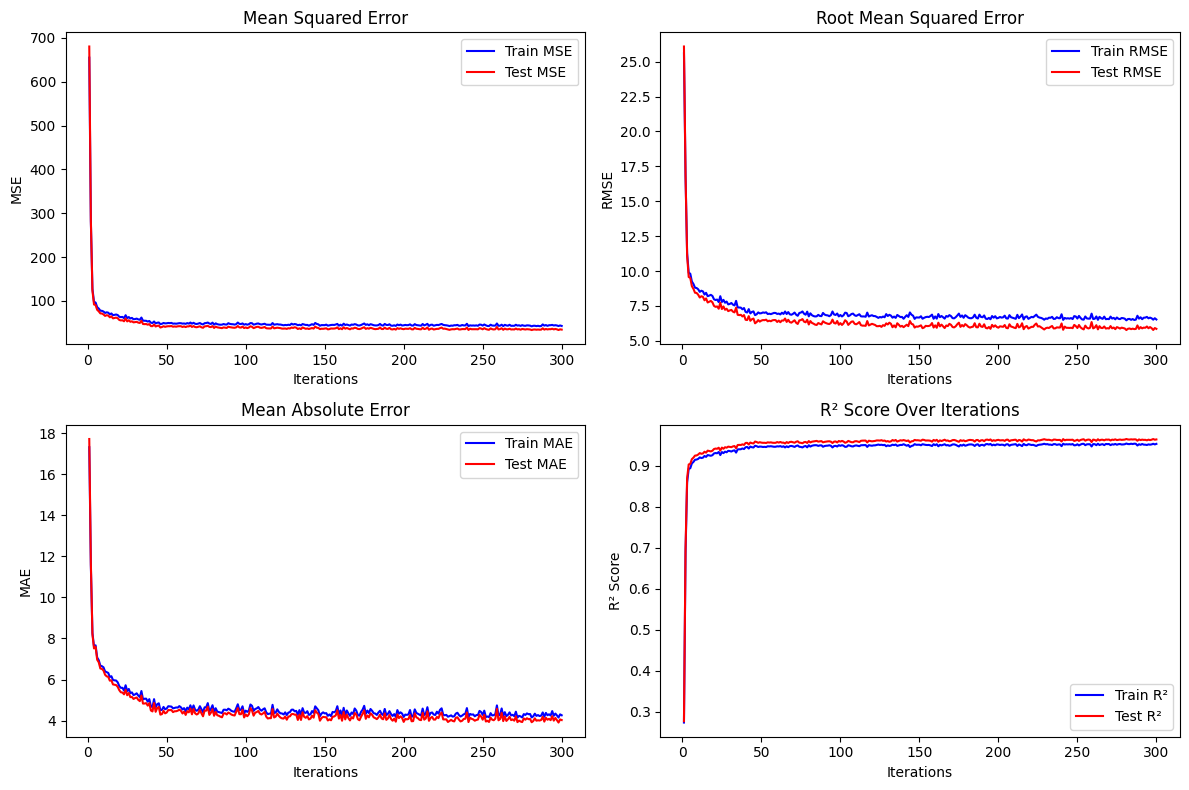

86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Final Model Performance (Unscaled Data):
MSE: 34.29708, RMSE: 5.85637, MAE: 4.02526, R² Score: 0.96355


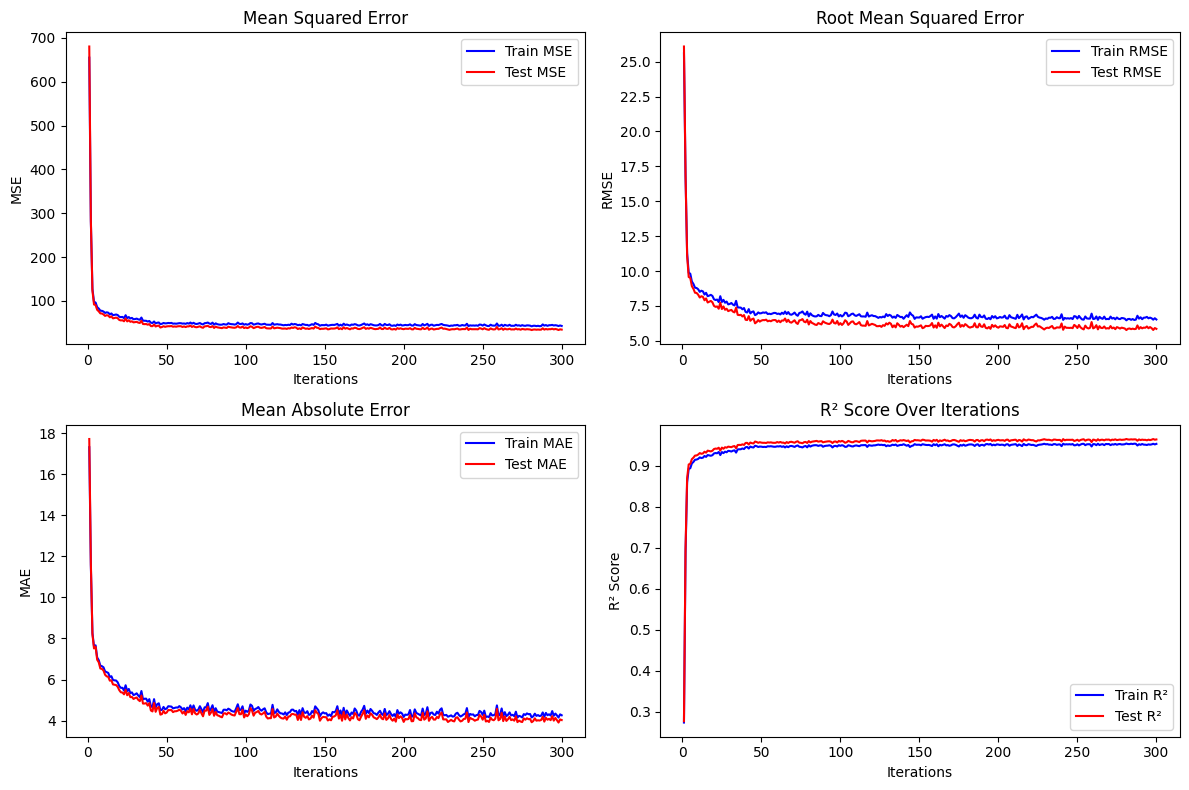

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Check for NaN values in the dataset
print("NaN in x_train:", np.isnan(x_train).sum())
print("NaN in y_train:", np.isnan(y_train).sum())
print("NaN in x_test:", np.isnan(x_test).sum())
print("NaN in y_test:", np.isnan(y_test).sum())

# Create and summarize the model
model = create_ffnn()
model.summary()

# Initialize TLBO optimizer with extended iterations if desired
tlbo = TLBO(model, x_train, y_train, x_test, y_test, pop_size=50, max_iter=300)

# Start the TLBO optimization process
tlbo.optimize()

# Convert x_test to tensor and make predictions
y_pred = model.predict(x_test)

# Ensure y_pred and y_test have the correct shape (2D for inverse_transform)
y_pred = np.array(y_pred).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Apply inverse transformation to predictions and true values
y_pred_original = scaler_target.inverse_transform(y_pred).flatten()

# Check if y_test is already 2D before applying inverse_transform
if y_test.shape[1] == 1:
    y_test_original = scaler_target.inverse_transform(y_test).flatten()
else:
    y_test_original = y_test.flatten()  # If already unscaled, use directly

# Compute evaluation metrics on unscaled data
mse = mean_squared_error(y_test_original, y_pred_original)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)

# Print final model performance
print(f"Final Model Performance (Unscaled Data):\nMSE: {mse:.5f}, RMSE: {rmse:.5f}, MAE: {mae:.5f}, R² Score: {r2:.5f}")

# Plot performance metrics
tlbo.plot_metrics()


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.5f}")


R² Score: 0.96355


In [ ]:
print(y_pred_original)

[108.20704  109.65784  109.475914 ... 226.12761  224.99649  226.67757 ]


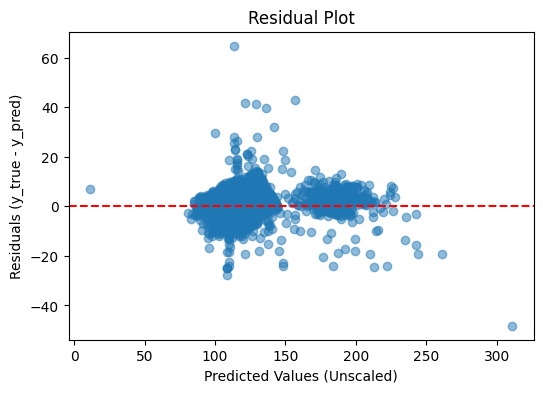

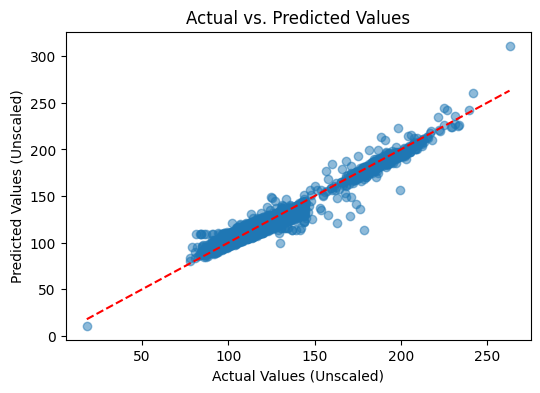

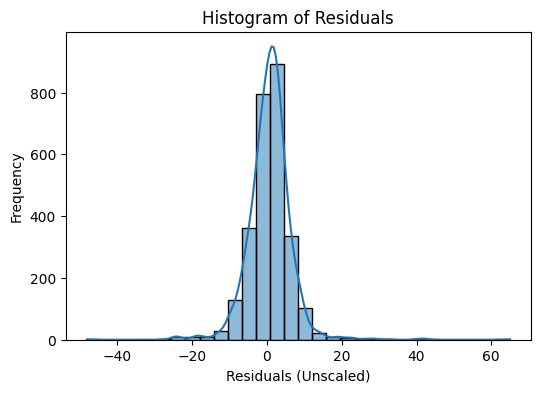

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure y_pred_original and y_test_original are available
if 'y_pred_original' not in locals() or 'y_test_original' not in locals():
    raise ValueError("y_pred_original and y_test_original are not defined. Run the previous code block first.")

# ✅ Compute residuals (Unscaled)
residuals = y_test_original - y_pred_original

# ✅ Residual Plot
plt.figure(figsize=(6, 4))
plt.scatter(y_pred_original, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values (Unscaled)")
plt.ylabel("Residuals (y_true - y_pred)")
plt.title("Residual Plot")
plt.show()

# ✅ Actual vs. Predicted Plot
plt.figure(figsize=(6, 4))
plt.scatter(y_test_original, y_pred_original, alpha=0.5)
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], 'r--')  # Ideal diagonal
plt.xlabel("Actual Values (Unscaled)")
plt.ylabel("Predicted Values (Unscaled)")
plt.title("Actual vs. Predicted Values")
plt.show()

# ✅ Residuals Distribution
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("Residuals (Unscaled)")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()


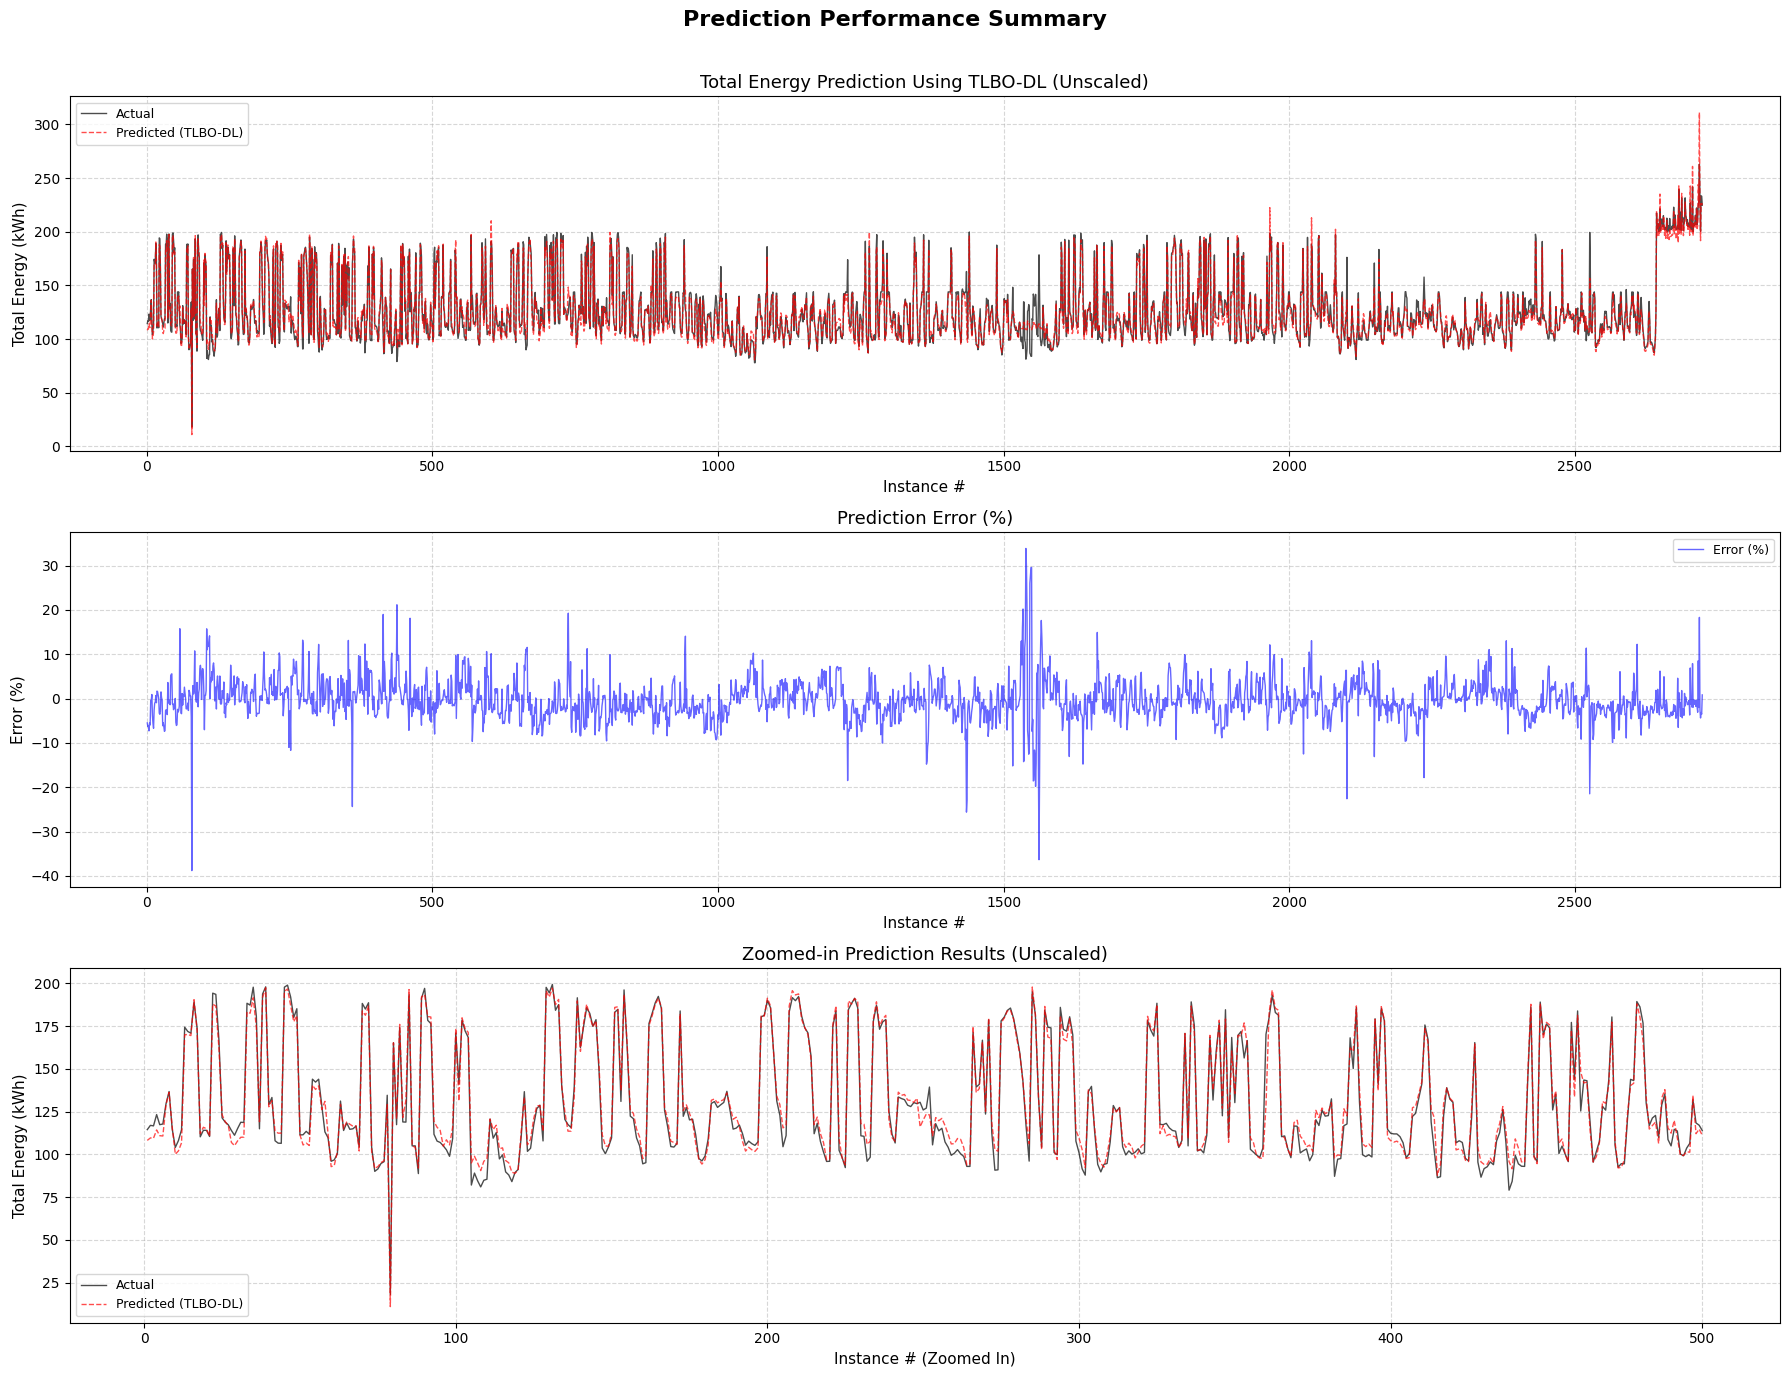

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Check for required variables
if 'y_pred_original' not in locals() or 'y_test_original' not in locals():
    raise ValueError("Variables y_pred_original and y_test_original must be defined.")

# Instance numbers
instances = np.arange(1, len(y_test_original) + 1)
error_pct = ((y_pred_original - y_test_original) / y_test_original) * 100

# Step = 1 (Use all data but reduce visual clutter)
step = 1
instances_sampled = instances[::step]
y_test_sampled = y_test_original[::step]
y_pred_sampled = y_pred_original[::step]
error_sampled = error_pct[::step]

# Plot
fig, axes = plt.subplots(3, 1, figsize=(18, 14))
fig.suptitle("Prediction Performance Summary", fontsize=16, fontweight='bold')

# Plot 1: Actual vs. Predicted
axes[0].plot(instances_sampled, y_test_sampled, label="Actual", color="black", linewidth=1, alpha=0.7)
axes[0].plot(instances_sampled, y_pred_sampled, label="Predicted (TLBO-DL)", color="red", linestyle="--", linewidth=1, alpha=0.7)
axes[0].set_title("Total Energy Prediction Using TLBO-DL (Unscaled)", fontsize=13)
axes[0].set_xlabel("Instance #", fontsize=11)
axes[0].set_ylabel("Total Energy (kWh)", fontsize=11)
axes[0].legend(fontsize=9)
axes[0].grid(True, linestyle='--', alpha=0.5)

# Plot 2: Error (%)
axes[1].plot(instances_sampled, error_sampled, label="Error (%)", color="blue", linewidth=1, alpha=0.6)
axes[1].set_title("Prediction Error (%)", fontsize=13)
axes[1].set_xlabel("Instance #", fontsize=11)
axes[1].set_ylabel("Error (%)", fontsize=11)
axes[1].legend(fontsize=9)
axes[1].grid(True, linestyle='--', alpha=0.5)

# Plot 3: Zoomed-in
zoom_end = min(500, len(instances))
axes[2].plot(instances[:zoom_end], y_test_original[:zoom_end], label="Actual", color="black", linewidth=1, alpha=0.7)
axes[2].plot(instances[:zoom_end], y_pred_original[:zoom_end], label="Predicted (TLBO-DL)", color="red", linestyle="--", linewidth=1, alpha=0.7)
axes[2].set_title("Zoomed-in Prediction Results (Unscaled)", fontsize=13)
axes[2].set_xlabel("Instance # (Zoomed In)", fontsize=11)
axes[2].set_ylabel("Total Energy (kWh)", fontsize=11)
axes[2].legend(fontsize=9)
axes[2].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()



Random Test Sample Predictions (Unscaled):
Index | Actual Value (kWh) | Predicted Value (kWh) | Error (kWh)
------------------------------------------------------------
1127   | 102.10             | 102.03                | 0.07
201    | 159.70             | 159.03                | 0.67
2556   | 111.00             | 108.74                | 2.26
641    | 184.50             | 185.00                | 0.50
1320   | 98.50              | 97.97                 | 0.53


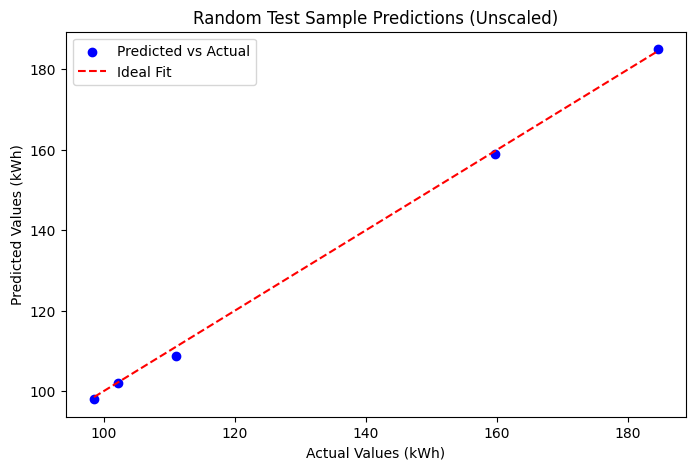

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Ensure inverse transformed values exist
if 'y_pred_original' not in locals() or 'y_test_original' not in locals():
    raise ValueError("y_pred_original and y_test_original are not defined. Run the previous code block first.")

# Select 5 random indices from the test set
random_indices = random.sample(range(len(x_test)), 5)

# Get actual and predicted values (Unscaled)
y_actual = y_test_original[random_indices]
y_predicted = y_pred_original[random_indices]

# Print the results
print("\nRandom Test Sample Predictions (Unscaled):")
print("Index | Actual Value (kWh) | Predicted Value (kWh) | Error (kWh)")
print("-" * 60)
for i, idx in enumerate(random_indices):
    actual = y_actual[i]
    predicted = y_predicted[i]
    error = abs(actual - predicted)
    print(f"{idx:<6} | {actual:<18.2f} | {predicted:<21.2f} | {error:.2f}")

# ✅ Optional: Plot actual vs predicted for the selected samples
plt.figure(figsize=(8, 5))
plt.scatter(y_actual, y_predicted, color='blue', label="Predicted vs Actual")
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], color='red', linestyle='--', label="Ideal Fit")
plt.xlabel("Actual Values (kWh)")
plt.ylabel("Predicted Values (kWh)")
plt.title("Random Test Sample Predictions (Unscaled)")
plt.legend()
plt.show()
